In [4]:
import pickle
with open('train_words.pkl', 'rb') as f:
    sentences = pickle.load(f)
with open('train_tags.pkl', 'rb') as f:
    tags = pickle.load(f)

# sentences.shape

In [11]:
from sklearn.model_selection import train_test_split
train_sentences, valid_sentences, train_taggings, valid_taggings = train_test_split(sentences, tags, test_size = 0.25, random_state = 42)

In [14]:
print(list(zip(train_sentences[30], train_taggings[30])))

[('Até', 'ADP'), ('hoje', 'ADV'), ('sou', 'VERB'), ('cineasta', 'NOUN'), (',', 'UNK'), ('estou', 'UNK'), ('trabalhando', 'VERB'), ('em', 'UNK'), ('um', 'DET'), ('filme', 'NOUN'), ('sobre', 'ADP'), ('a', 'DET'), ('esquerda', 'NOUN'), ('americana', 'ADJ'), ('para', 'ADP'), ('a', 'DET'), ('televisão', 'NOUN')]


In [15]:
# use a defaultdict to count the number of occurrences of each tag
import collections
tagset = collections.defaultdict(int)

for tagging in train_taggings:
  for tag in tagging:
    tagset[tag] += 1

print('number of different tags:', len(tagset))

# print count and tag sorted by decreasing count
for tag, count in sorted(tagset.items(), reverse=True, key=lambda x: x[1]):
  print(count, tag)

number of different tags: 14
475370 UNK
358565 NOUN
174499 DET
169939 ADP
142766 VERB
94035 .
84736 ADJ
46317 ADV
31477 CONJ
30806 PRON
30007 NUM
8865 PRT
7807 X
9 INTJ


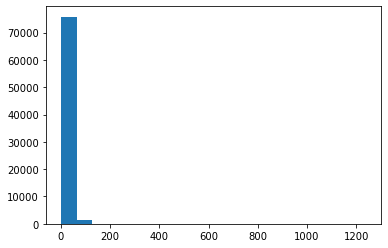

max length: 1238


In [16]:
from matplotlib import pyplot as plt

# compute and show histogram for sentence length
plt.hist([len(sentence) for sentence in train_sentences], 20)
plt.show()

# compute max sentence length
print('max length:', max([len(sentence) for sentence in train_sentences]))

In [17]:
# train_sentences

In [18]:
# install transformers package
!pip -q install transformers

# import relevant classes for pretrained tokenizer and model
from transformers import AutoTokenizer, AutoModel

In [19]:
# load tokenizer for a specific bert model (bert-base-cased)
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')

# tokenize an example sentence
tokenizer.tokenize('This tokenizer is sooooo awesome.')

['This',
 'tok',
 '##eni',
 '##zer',
 'is',
 'soo',
 '##oo',
 '##o',
 'aw',
 '##eso',
 '##me',
 '.']

In [20]:
import re

def align_tokenizations(sentences, taggings):
  bert_tokenized_sentences = []
  aligned_taggings = []
  count = 0
  for sentence, tagging in zip(sentences, taggings):
    # first generate BERT-tokenization
    try:
      bert_tokenized_sentence = tokenizer.tokenize(' '.join(sentence))
    except:
      print("Error",sentence)
    # print(bert_tokenized_sentence, sentence)
    aligned_tagging = []
    current_word = ''

    index = 0 # index of current word in sentence and tagging
    for token in bert_tokenized_sentence:
      current_word += re.sub(r'^##', '', token) # recompose word with subtoken
      # print(index, token, len(sentence)) #, sentence)
      try: 
        sentence[index] = sentence[index].replace('\xad', '') # fix bug in data
      except:
        print(sentence)
        break  
        # print(bert_tokenized_sentence)
        

      # note that some word factors correspond to unknown words in BERT
      # print(token, sentence[index].startswith(current_word), sentence[index], current_word)
      # assert token == '[UNK]' or sentence[index].startswith(current_word)

      if token == '[UNK]' or sentence[index] == current_word: # if we completed a word
        current_word = ''
        aligned_tagging.append(tagging[index])
        index += 1
      else: # otherwise insert padding
        aligned_tagging.append('<pad>')

    # assert len(bert_tokenized_sentence) == len(aligned_tagging)

    if(len(aligned_tagging)==len(bert_tokenized_sentence)):
        
      bert_tokenized_sentences.append(bert_tokenized_sentence)
      aligned_taggings.append(aligned_tagging)
    else: 
      print(len(aligned_tagging), len(bert_tokenized_sentence))
      count+=1 

  return bert_tokenized_sentences, aligned_taggings

train_bert_tokenized_sentences, train_aligned_taggings = align_tokenizations(train_sentences, train_taggings)
valid_bert_tokenized_sentences, valid_aligned_taggings = align_tokenizations(valid_sentences, valid_taggings)
test_bert_tokenized_sentences, test_aligned_taggings = align_tokenizations(valid_sentences, valid_taggings)

# print(train_bert_tokenized_sentences[42])
# print(train_aligned_taggings[42])

Token indices sequence length is longer than the specified maximum sequence length for this model (3708 > 512). Running this sequence through the model will result in indexing errors


['大福', '靠在', '父親', '的', '床', '邊', '打瞌睡']
11 12
['起步', '甚', '早', '的', '德國', '在', '這', '方面', '卻', '仍', '步履', '蹣跚']
16 17
['有', '了', '一對', '小', '犄角']
6 7
['枝頭', '上', '的', '小鳥', '總是', '吱吱喳喳', '的', '叫']
11 14
['電影', '中', '正面', '人物', '的', '行為', '必定', '不會', '和', '觀眾', '的', '認知', '產生', '牴觸']
23 24
['這句', '話', '就', '像', '是', '堅強', '的', '胳臂']
10 11
['日亞航', '目前', '所', '使用', '的', '機種', '主要', '為', '波音', '７４７', '及', 'ＤＣ－１０']
21 24
['外號', '泰山', '的', '黑索汀', '今天', '在', '英國', '保守黨', '黨魁', '選舉', '中', '來勢洶洶']
24 25
['你', '兒子', '賭氣', '不', '吃', '紅蘿蔔', '時', '可以', '連', '餓', '十九個', '不吭一氣']
20 22
['Segundo', 'o', 'dono', 'de', 'o', 'restaurante', ',', 'Fuad', 'Zegaid', ',', '61', ',', 'este', 'é', 'o', 'primeiro', 'caso', 'de', 'assalto', 'em', 'o', 'Dinho`s']
27 28
['再', '給', '人', '痛苦', '和', '懊悔']
7 8
['就', '在', '自己', '的', '小', '房間', '裡', '打瞌睡']
11 12
['他', '伸開', '胳臂']
4 5
['鼓聲', '咚咚']
3 4
['他', '伸開', '胳臂']
4 5
['鼓聲', '咚咚']
3 4


In [24]:
import torch
device = torch.device('cuda' if torch.cuda.is_available else 'cpu') #

import collections

label_vocab = collections.defaultdict(lambda: len(label_vocab))
label_vocab['<pad>'] = 0

def convert_to_ids(sentences, taggings):
  sentences_ids = []
  taggings_ids = []
  for sentence, tagging in zip(sentences, taggings):
    sentence_tensor = torch.tensor(tokenizer.convert_tokens_to_ids(['[CLS]'] + sentence + ['SEP'])).long()
    tagging_tensor = torch.tensor([0] + [label_vocab[tag] for tag in tagging] + [0]).long()

    sentences_ids.append(sentence_tensor.to(device))
    taggings_ids.append(tagging_tensor.to(device))
  return sentences_ids, taggings_ids

train_sentences_ids, train_taggings_ids = convert_to_ids(train_bert_tokenized_sentences, train_aligned_taggings)
valid_sentences_ids, valid_taggings_ids = convert_to_ids(valid_bert_tokenized_sentences, valid_aligned_taggings)
test_sentences_ids, test_taggings_ids = convert_to_ids(test_bert_tokenized_sentences, test_aligned_taggings)

# print(train_sentences_ids[42])
# print(train_taggings_ids[42])
print('num labels:', len(label_vocab))

num labels: 15


In [25]:
len(train_taggings_ids)

77199

In [26]:
print('num labels:', len(label_vocab))

num labels: 15


In [27]:
from torch.utils.data import Dataset

class PosTaggingDataset(Dataset):
  def __init__(self, sentences, taggings):
    assert len(sentences) == len(taggings)
    self.sentences = sentences
    self.taggings = taggings

  def __getitem__(self, i):
    return self.sentences[i], self.taggings[i]


  def __len__(self):
    return len(self.sentences)

In [28]:
def collate_fn(items):
  max_len = max(len(item[0]) for item in items)

  sentences = torch.zeros((len(items), max_len), device=items[0][0].device).long().to(device)
  taggings = torch.zeros((len(items), max_len)).long().to(device)

  for i, (sentence, tagging) in enumerate(items):
    sentences[i][0:len(sentence)] = sentence
    taggings[i][0:len(tagging)] = tagging

  return sentences, taggings


x, y = collate_fn([[torch.tensor([1, 2, 3]), torch.tensor([4, 5, 6])], [torch.tensor([1, 2]), torch.tensor([3, 4])]])
print(x.shape, y.shape)

torch.Size([2, 3]) torch.Size([2, 3])


In [29]:
from torch.utils.data import DataLoader

batch_size = 64

train_loader = DataLoader(PosTaggingDataset(train_sentences_ids, train_taggings_ids), batch_size=batch_size, collate_fn=collate_fn, shuffle=True)
valid_loader = DataLoader(PosTaggingDataset(valid_sentences_ids, valid_taggings_ids), batch_size=batch_size, collate_fn=collate_fn)
test_loader = DataLoader(PosTaggingDataset(test_sentences_ids, test_taggings_ids), batch_size=batch_size, collate_fn=collate_fn)

In [30]:
import torch.nn as nn
import torch.nn.functional as F

class RNNClassifier(nn.Module):
  def __init__(self, num_labels, embed_size=128, hidden_size=128):
    super().__init__()
    self.embedding = nn.Embedding(tokenizer.vocab_size, embed_size, padding_idx=tokenizer.pad_token_id)
    self.rnn = nn.GRU(embed_size, hidden_size, num_layers=1, bidirectional=True, batch_first=True)
    self.decision = nn.Linear(1 * 2 * hidden_size, num_labels) # size output by GRU is number of layers * number of directions * hidden size
    self.to(device)
  
  def forward(self, sentences):
    embed_rep = self.embedding(sentences)
    word_rep, sentence_rep = self.rnn(embed_rep)
    return self.decision(F.dropout(F.gelu(word_rep), 0.3))

# check that model works on an arbitrary batch that contains two sentences of length 3
rnn_model = RNNClassifier(len(label_vocab))
with torch.no_grad():
  y = rnn_model(torch.tensor([[0, 1, 2], [3, 4, 5]]).to(device))

# the expected shape is (batch size, max sentence length, number of labels)
print(y.shape)

torch.Size([2, 3, 15])


In [31]:
def perf(model, loader, alphabet=None):
  criterion = nn.CrossEntropyLoss()
  model.eval() # do not apply training-specific steps such as dropout
  total_loss = correct = num_loss = num_perf = 0
  for i, (x, y) in enumerate(loader):
    with torch.no_grad(): # no need to store computation graph for gradients
      # perform inference and compute loss
      if(x.shape[1]>=512 or x.shape[0]!=64):
        continue 
      if(alphabet):
        y_scores = model(x, alphabet[i])
      else:  
        y_scores = model(x)
      loss = criterion(y_scores.view(-1, len(label_vocab)), y.view(-1)) # requires tensors of shape (num-instances, num-labels) and (num-instances)

      # gather loss statistics
      total_loss += loss.item()
      num_loss += 1

      # gather accuracy statistics
      y_pred = torch.max(y_scores, 2)[1] # compute highest-scoring tag
      mask = (y != 0) # ignore <pad> tags
      correct += torch.sum((y_pred == y) * mask) # compute number of correct predictions
      num_perf += torch.sum(mask).item()
  return total_loss / num_loss, correct.item() / num_perf

# without training, accuracy should be a bit less than 2% (chance of getting a label correct)
perf(rnn_model, valid_loader)

(2.729502857327461, 0.10131068005940028)

In [32]:
import torch.optim as optim

def fit(model, epochs, alphabet=None):
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=1e-2)
  for epoch in range(epochs):
    model.train()
    total_loss = num = 0
    for i, (x, y) in enumerate(train_loader):
      optimizer.zero_grad() # start accumulating gradients
      if(x.shape[1]>=512 or x.shape[0]!=64):
        continue 
      else:  
        if(alphabet):
          y_scores = model(x, alphabet[i])
        else:  
          y_scores = model(x)
        loss = criterion(y_scores.view(-1, len(label_vocab)), y.view(-1))
        loss.backward() # compute gradients though computation graph
        optimizer.step() # modify model parameters
        total_loss += loss.item()
        num += 1
    print(1 + epoch, total_loss / num, *perf(model, valid_loader))

In [33]:
rnn_model = RNNClassifier(len(label_vocab))
fit(rnn_model, 5)

1 0.1061698165974635 0.06013810507953167 0.9145908851932815
2 0.08364735104398394 0.3282135360315442 0.5633304740031545
3 nan nan 0.0
4 nan nan 0.0
5 nan nan 0.0


In [34]:
import torch.nn as nn
import torch
import torch.nn.functional as F


class CustomedBiLstm(nn.Module):
    def __init__(self,
                 alphabet_size,
                 vocab_size,
                 word_embed_dim,
                 char_embed_dim,
                 char_hidden_dim,
                 word_hidden_dim,
                 n_tags,
                 use_gpu):
        super(CustomedBiLstm, self).__init__()
        self.alphabet_size = alphabet_size
        self.vocab_size = vocab_size
        self.word_embed_dim = word_embed_dim
        self.char_embed_dim = char_embed_dim
        self.char_hidden_dim = char_hidden_dim
        self.word_hidden_dim = word_hidden_dim
        self.n_tags = n_tags

        self.char_embedding_layer = nn.Embedding(self.alphabet_size, self.char_embed_dim)
        self.lower_LSTM = nn.LSTM(input_size=self.char_embed_dim,
                                  hidden_size=self.char_hidden_dim,
                                  batch_first=True)
        
        self.word_embedding_layer = nn.Embedding(self.vocab_size, self.word_embed_dim)
        self.upper_LSTM = nn.LSTM(input_size=self.char_hidden_dim + self.word_embed_dim,
                                  hidden_size=self.word_hidden_dim,
                                  bidirectional=True)
        self.hidden_to_tag = nn.Linear(self.word_hidden_dim*2, self.n_tags)

    def forward(self, tokens_tensor, char_tensor):
        char_embeds = self.char_embedding_layer(char_tensor)
        lower_lstm_out, hidden = self.lower_LSTM(char_embeds)
        last_state_lower_lstm = lower_lstm_out[-1]
        tokens_embeds = self.word_embedding_layer(tokens_tensor)

        final_embeds = torch.cat((last_state_lower_lstm, tokens_embeds), 1).view(tokens_tensor.shape[0], 1, -1)
        upper_lstm_out, hidden = self.upper_LSTM(final_embeds)
        out = self.hidden_to_tag(upper_lstm_out.view(tokens_tensor.shape[0], -1))
        out = F.log_softmax(out, dim=1)
        return out


In [35]:
!pip install torchtext==0.6.0 --quiet

In [36]:
from torchtext import data
def build_alphabet_from_sentence_tokens(sentences_tokens):
    """
    Build alphabet from tokens by converting tokens to character
    :param sentences_tokens:
    :return:
    """
    def to_char(tokens):
      # try:
      return [c for tok in tokens for c in list(tok)]
      # except:
      #   print("Error")
    sentences_char = [to_char(sent) for sent in sentences_tokens]
    # print(sentences_char[0])

    char_field = data.Field(tokenize=list, init_token='<root>')
    fields = [('char', char_field)]
    examples = [data.Example.fromlist([t], fields) for t in sentences_char]
    # print(examples[0])
    torch_dataset = data.Dataset(examples, fields)
    char_field.build_vocab(torch_dataset)
    return char_field.vocab


In [37]:
alphabet = build_alphabet_from_sentence_tokens(train_sentences)


In [38]:
def build_vocab_from_sentences_tokens(sentences_tokens):
    """
    use torch text to build vocab object from a list of sentences that is already tokenized in to tokens
    :param sentences_tokens: list of list of tokens
    :return: torchtext.vocab object
    """
    token_field = data.Field(tokenize=list, init_token='<root>')
    fields = [('tokens', token_field)]
    examples = [data.Example.fromlist([t], fields) for t in sentences_tokens]
    torch_dataset = data.Dataset(examples, fields)
    token_field.build_vocab(torch_dataset)
    return token_field.vocab


vocab = build_vocab_from_sentences_tokens(train_sentences)

In [39]:
len(vocab)

186648

In [41]:
import numpy as np

def get_one_batch(tokens, vocab, alphabet, tags, all_tags): #):
    def token_to_char_tensor(tok):
        tensor = torch.LongTensor([alphabet.stoi[c] for c in tok])
        return tensor

    tokens_tensor = torch.LongTensor([vocab.stoi[tok] for tok in tokens]).to(device)
    # Perform padding for tokens
    max_tok_len = max([len(tok) for tok in tokens])
    # print(max_tok_len)
    tokens_as_char = [token_to_char_tensor(tok) for tok in tokens]
    for idx, tok in enumerate(tokens_as_char):
        if len(tok) < max_tok_len:
            paddings = torch.from_numpy(np.full(max_tok_len - len(tok), alphabet.stoi['<pad>']))
            tok = torch.cat((tok, paddings))
        tokens_as_char[idx] = tok
    char_tensor = torch.stack([c_tnsr for c_tnsr in tokens_as_char], dim=1).to(device)
    
    tags_tensor = []
    for tag in tags: 
        try: 
            tags_tensor.append(all_tags.index(tag))
        except:
            tags_tensor.append(0)
            
#     tags_tensor = torch.LongTensor([all_tags.index(tag) for tag in tags]).to(device)
    tags_tensor = torch.LongTensor(tags_tensor).to(device)
    return tokens_tensor, char_tensor, tags_tensor


tokens_tensor, char_tensor, tags_tensor = get_one_batch(train_sentences[1], vocab,  alphabet, train_taggings[1], list(tagset))

In [46]:
# device = torch.device("cpu")

bilstm = CustomedBiLstm(alphabet_size = len(alphabet),
                 vocab_size = len(vocab),
                 word_embed_dim = 128,
                 char_embed_dim = 100,
                 char_hidden_dim = 100,
                 word_hidden_dim = 100, n_tags=len(label_vocab), use_gpu=True).to(device)


In [47]:
def perf_bilstm(model, loader):
  criterion = nn.NLLLoss()
  model.eval() # do not apply training-specific steps such as dropout
  total_loss = correct = num_loss = num_perf = 0
  # for i, (x, y) in enumerate(loader):
  for i in range(len(valid_sentences)):
    with torch.no_grad(): # no need to store computation graph for gradients
      # perform inference and compute loss
      # if(x.shape[1]>=512 or x.shape[0]!=64):
      #   continue 
      # if(alphabet):
      #   y_scores = model(x, alphabet[i])
      # else:  
      tokens_tensor, char_tensor, tag_tensor = get_one_batch(valid_sentences[i], vocab,  alphabet, valid_taggings[i], list(tagset))
      y_scores = model(tokens_tensor, char_tensor)
      loss = criterion(y_scores, tag_tensor)
      # loss = criterion(y_scores.view(-1, len(label_vocab)), y.view(-1)) # requires tensors of shape (num-instances, num-labels) and (num-instances)

      # gather loss statistics
      total_loss += loss.item()
      num_loss += 1

      # gather accuracy statistics
      
      y_pred = torch.max(y_scores, 1)[1]
      mask = (tag_tensor != 0)
      y_pred = y_pred[torch.where(tag_tensor!=0)]
      tag_tensor = tag_tensor[torch.where(tag_tensor!=0)]

    
      correct += torch.sum((y_pred == tag_tensor)) #torch.sum((y_pred == tag_tensor)) # compute number of correct predictions
      num_perf += len(y_pred)
  return total_loss / num_loss, correct.item() / num_perf

# without training, accuracy should be a bit less than 2% (chance of getting a label correct)
# perf(rnn_model, valid_loader)

In [48]:
import torch.optim as optim

def fit_bilstm(model, epochs):
  # criterion = nn.CrossEntropyLoss()
  criterion = nn.NLLLoss()
  optimizer = optim.Adam(model.parameters(), lr=1e-2)
#   model = model.to(device)
#   train_sentences = train_sentences.to(device)
  
  for epoch in range(epochs):
    model.train()
    total_loss = num = 0
    # for i, (x, y) in enumerate(train_loader):
    for i in range(len(train_sentences)):

      tokens_tensor, char_tensor, tag_tensor = get_one_batch(train_sentences[i], vocab,  alphabet, train_taggings[i], list(tagset))

      optimizer.zero_grad() # start accumulating gradients
      # print(i, tokens_tensor.shape, char_tensor.shape)
      # print(tokens_tensor)
      y_scores = model(tokens_tensor, char_tensor)
      
      loss = criterion(y_scores, tag_tensor)
      
      # loss = criterion(y_scores.view(-1, len(label_vocab)), y.view(-1))
      loss.backward() # compute gradients though computation graph
      optimizer.step() # modify model parameters
      total_loss += loss.item()
      num += 1
    print(1 + epoch, total_loss / num, *perf_bilstm(model, valid_loader))

fit_bilstm(bilstm, 30)

1 0.46909926785410677 0.37863804531904893 0.8839363329192672
2 0.34231811047399835 0.36011845290907196 0.8956931240661464
3 0.30537019414672795 0.3498213037611266 0.9030430082872023
4 0.2819629779909792 0.36165203424894854 0.8945189567548636
5 0.26502492568003233 0.3432860984393092 0.9045119772624768
6 0.2605210868565978 0.3600860289489466 0.899649009642786
7 0.26070244075720345 0.34731072475053165 0.9041466247729145
8 0.24151677397327223 0.34749164177054204 0.9066637774423814
9 0.23767418284759126 0.34991495553686525 0.9045069379177931


KeyboardInterrupt: 

In [49]:
class LinearProbeRandom(nn.Module):
  def __init__(self, num_labels):
    super().__init__()
    self.embedding = nn.Embedding(tokenizer.vocab_size, 768)
    self.probe = nn.Linear(768, num_labels)
    self.to(device)

  def parameters(self):
    return self.probe.parameters()
  
  def forward(self, sentences):
    with torch.no_grad(): # embeddings are not trained
      word_rep = self.embedding(sentences)
    return self.probe(word_rep)

# the model should return a tensor of shape (batch size, sequence length, number of labels)
random_model = LinearProbeRandom(len(label_vocab))
with torch.no_grad():
  y = random_model(torch.tensor([[0, 1, 2], [3, 4, 5]]).to(device))
print(y.shape)

torch.Size([2, 3, 15])


In [50]:
random_model = LinearProbeRandom(len(label_vocab))
fit(random_model, 5)

1 0.4040638546306357 0.37073015777394175 0.46374646042594797
2 0.37236741375957955 0.37348872505128383 0.4636486897811229
3 0.371274112704349 0.3784518856368959 0.46136675982548864
4 0.3744521512089917 0.3748056302405894 0.44985564994419697
5 0.3740484201045609 0.37354439359158276 0.4566405637492275


In [51]:
class LinearProbeBert(nn.Module):
  def __init__(self, num_labels):
    super().__init__()
    self.bert = AutoModel.from_pretrained('bert-base-multilingual-cased')
    self.probe = nn.Linear(self.bert.config.hidden_size, num_labels)
    self.to(device)

  def parameters(self):
    return self.probe.parameters()
  
  def forward(self, sentences):
    with torch.no_grad(): # no training of BERT parameters
      word_rep, sentence_rep = self.bert(sentences, return_dict=False)
    return self.probe(word_rep)

# the model should return a tensor of shape (batch size, sequence length, number of labels)
bert_model = LinearProbeBert(len(label_vocab))
y = bert_model(torch.tensor([[0, 1, 2], [3, 4, 5]]).to(device))
print(y.shape)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


torch.Size([2, 3, 15])


In [ ]:
bert_model = LinearProbeBert(len(label_vocab))
fit(bert_model, 5)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


1 0.14632718710910786 0.10150510736741125 0.8663567521698626
2 0.12898163423190723 0.10288331718649715 0.8662091738380512
3 0.12970071518987888 0.10043854342307895 0.8644603706060857


In [ ]:
print('RNN representation (supervised)', *perf(rnn_model, test_loader))
print('RANDOM representation (unsupervised)', *perf(random_model, test_loader))
print('BERT representation (unsupervised)', *perf(bert_model, test_loader))